# **Loan-Prediction**

A loan prediction model in machine learning is a predictive analytics tool that uses historical data and various features to assess the creditworthiness of a borrower and predict whether they are likely to repay a loan or default on it. These models are widely used in the financial industry to automate and improve the loan approval process.

Here are some of the key factors that can influence the loan approval process:

1) **Gender:** Gender may influence loan approval decisions in some regions or cultures due to historical biases or societal norms. Some models may consider gender-neutral factors instead to promote fairness.

2) **Marital Status (Married):** Married individuals might be seen as more stable and responsible, which could positively impact loan approval chances.

3) **Dependents:** The number of dependents can affect an applicant's ability to repay a loan. More dependents may indicate higher financial responsibilities and potentially reduce loan approval chances.

4) **Education:** Applicants with higher education levels may have better job prospects and income potential, potentially increasing their chances of loan approval.

5) **Self-Employed:** Self-employed individuals might face different approval criteria than those who are employed by others, as their income can be less stable.

6) **Applicant Income:** A higher applicant income typically increases the likelihood of loan approval, as it demonstrates the ability to repay the loan.

7) **Coapplicant Income:** Coapplicant income can also positively impact loan approval, especially if it contributes significantly to the household income.

8) **Loan Amount:** The requested loan amount is a critical factor, as it directly affects the risk for the lender. Larger loan amounts may be subject to stricter approval criteria.

9) **Loan Amount Term:** The loan term can impact an applicant's ability to manage monthly payments. Longer terms may be associated with lower monthly payments but may also increase the total interest paid.

10) **Credit History:** Credit history is one of the most influential factors. A good credit history (a history of repaying previous loans on time) significantly increases the chances of loan approval.

11) **Property Area:** The location of the property being financed can affect loan approval, as different areas may have varying levels of risk associated with them.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [3]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('loan_dataset.csv')

In [4]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [5]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001001,Male,No,0,Graduate,Yes,50849,0,560000,240,1,Urban,Y
1,LP001002,Male,Yes,1,Graduate,Yes,40583,10508,450000,360,1,Rural,Y
2,LP001003,Male,Yes,0,Graduate,Yes,30000,0,650000,360,1,Urban,Y
3,LP001004,Male,Yes,0,Not Graduate,Yes,20583,20358,550000,360,1,Urban,Y
4,LP001005,Male,No,0,Graduate,Yes,60000,0,450000,360,1,Urban,Y


In [6]:
# number of rows and columns
loan_dataset.shape

(150, 13)

In [7]:
# statistical measures
loan_dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.326667,27396.160000,12495.600000,581920.000000,320.000000,0.446667
std,1.167207,21241.922054,20720.312253,149870.884923,74.437488,0.498813
min,0.000000,7000.000000,0.000000,420000.000000,120.000000,0.000000
25%,0.000000,9525.000000,0.000000,450000.000000,270.000000,0.000000
50%,2.000000,11349.000000,9750.000000,560000.000000,360.000000,0.000000
75%,2.000000,50849.000000,10514.000000,667000.000000,360.000000,1.000000
max,3.000000,102841.000000,95000.000000,990000.000000,360.000000,1.000000


In [8]:
pd.crosstab(loan_dataset['Credit_History'],loan_dataset['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0,83,0,83
1,0,67,67
All,83,67,150


##Boxplot for applicant income variable

<Axes: >

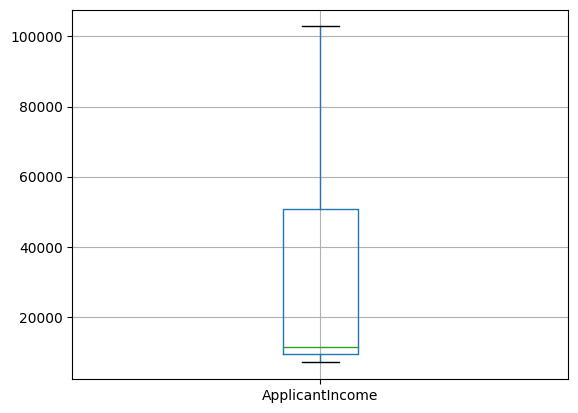

In [9]:
loan_dataset.boxplot(column = 'ApplicantIncome')

##Hisogram for same variables

<Axes: >

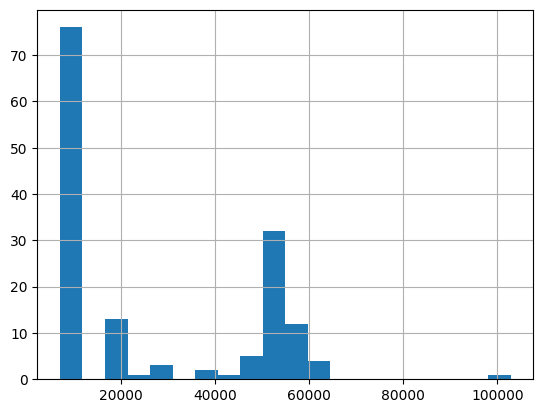

In [10]:
loan_dataset['ApplicantIncome'].hist(bins=20)

##Applicant income through histogram

<Axes: >

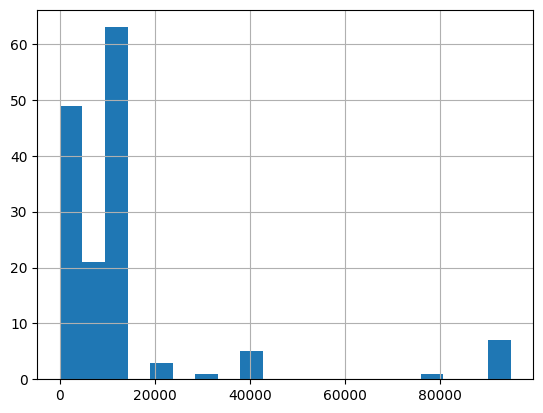

In [11]:
loan_dataset['CoapplicantIncome'].hist(bins=20)

##Applicant income relation with education by box plot

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

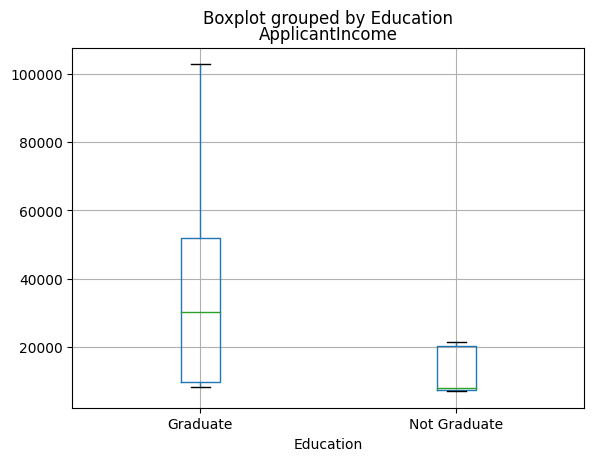

In [12]:
loan_dataset.boxplot(column = 'ApplicantIncome', by='Education')

Graduated person have high selary then non_graduate

Loan among variable

<Axes: >

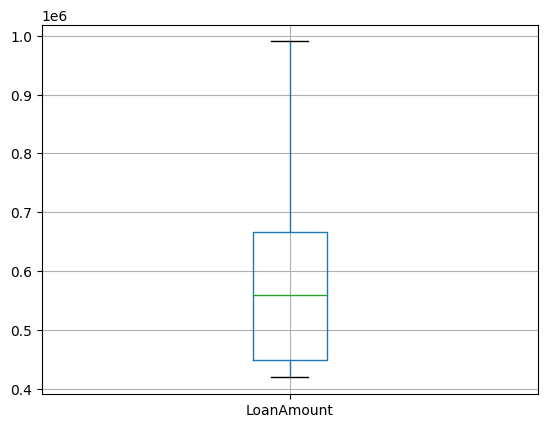

In [13]:
loan_dataset.boxplot(column = 'LoanAmount')

Here,applicant with cradit history o.0 is more eligiable then cradit history 1.0

# Data Preprocessing

In [14]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [16]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [18]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001001,Male,No,0,Graduate,Yes,50849,0,560000,240,1,Urban,1
1,LP001002,Male,Yes,1,Graduate,Yes,40583,10508,450000,360,1,Rural,1
2,LP001003,Male,Yes,0,Graduate,Yes,30000,0,650000,360,1,Urban,1
3,LP001004,Male,Yes,0,Not Graduate,Yes,20583,20358,550000,360,1,Urban,1
4,LP001005,Male,No,0,Graduate,Yes,60000,0,450000,360,1,Urban,1


In [19]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

2    62
0    61
3    24
1     3
Name: Dependents, dtype: int64

In [20]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [21]:
# dependent values
loan_dataset['Dependents'].value_counts()

2    62
0    61
3    24
1     3
Name: Dependents, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

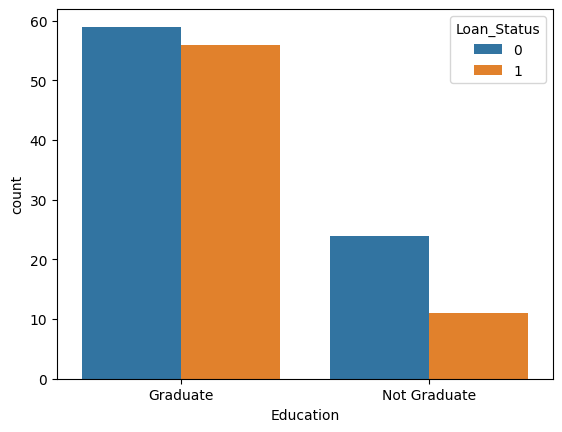

In [22]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

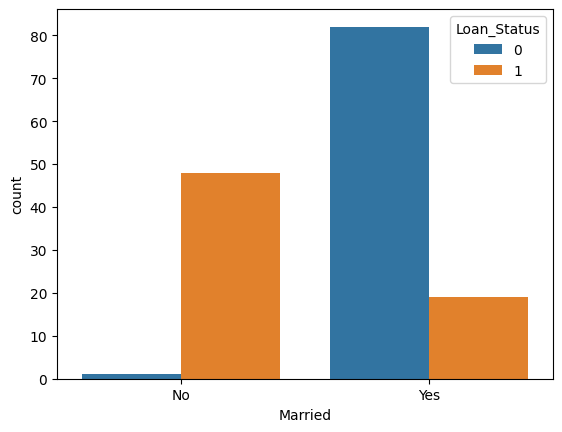

In [23]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [24]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [25]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001001,1,0,0,1,1,50849,0,560000,240,1,2,1
1,LP001002,1,1,1,1,1,40583,10508,450000,360,1,0,1
2,LP001003,1,1,0,1,1,30000,0,650000,360,1,2,1
3,LP001004,1,1,0,0,1,20583,20358,550000,360,1,2,1
4,LP001005,1,0,0,1,1,60000,0,450000,360,1,2,1


In [26]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [27]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              1            50849   
1         1        1           1          1              1            40583   
2         1        1           0          1              1            30000   
3         1        1           0          0              1            20583   
4         1        0           0          1              1            60000   
..      ...      ...         ...        ...            ...              ...   
145       1        0           0          1              1            51849   
146       1        1           2          1              0             8500   
147       1        0           0          1              1            48849   
148       1        1           2          1              0            11299   
149       1        1           3          0              0             7000   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# Exploratory Data Analysis (EDA)

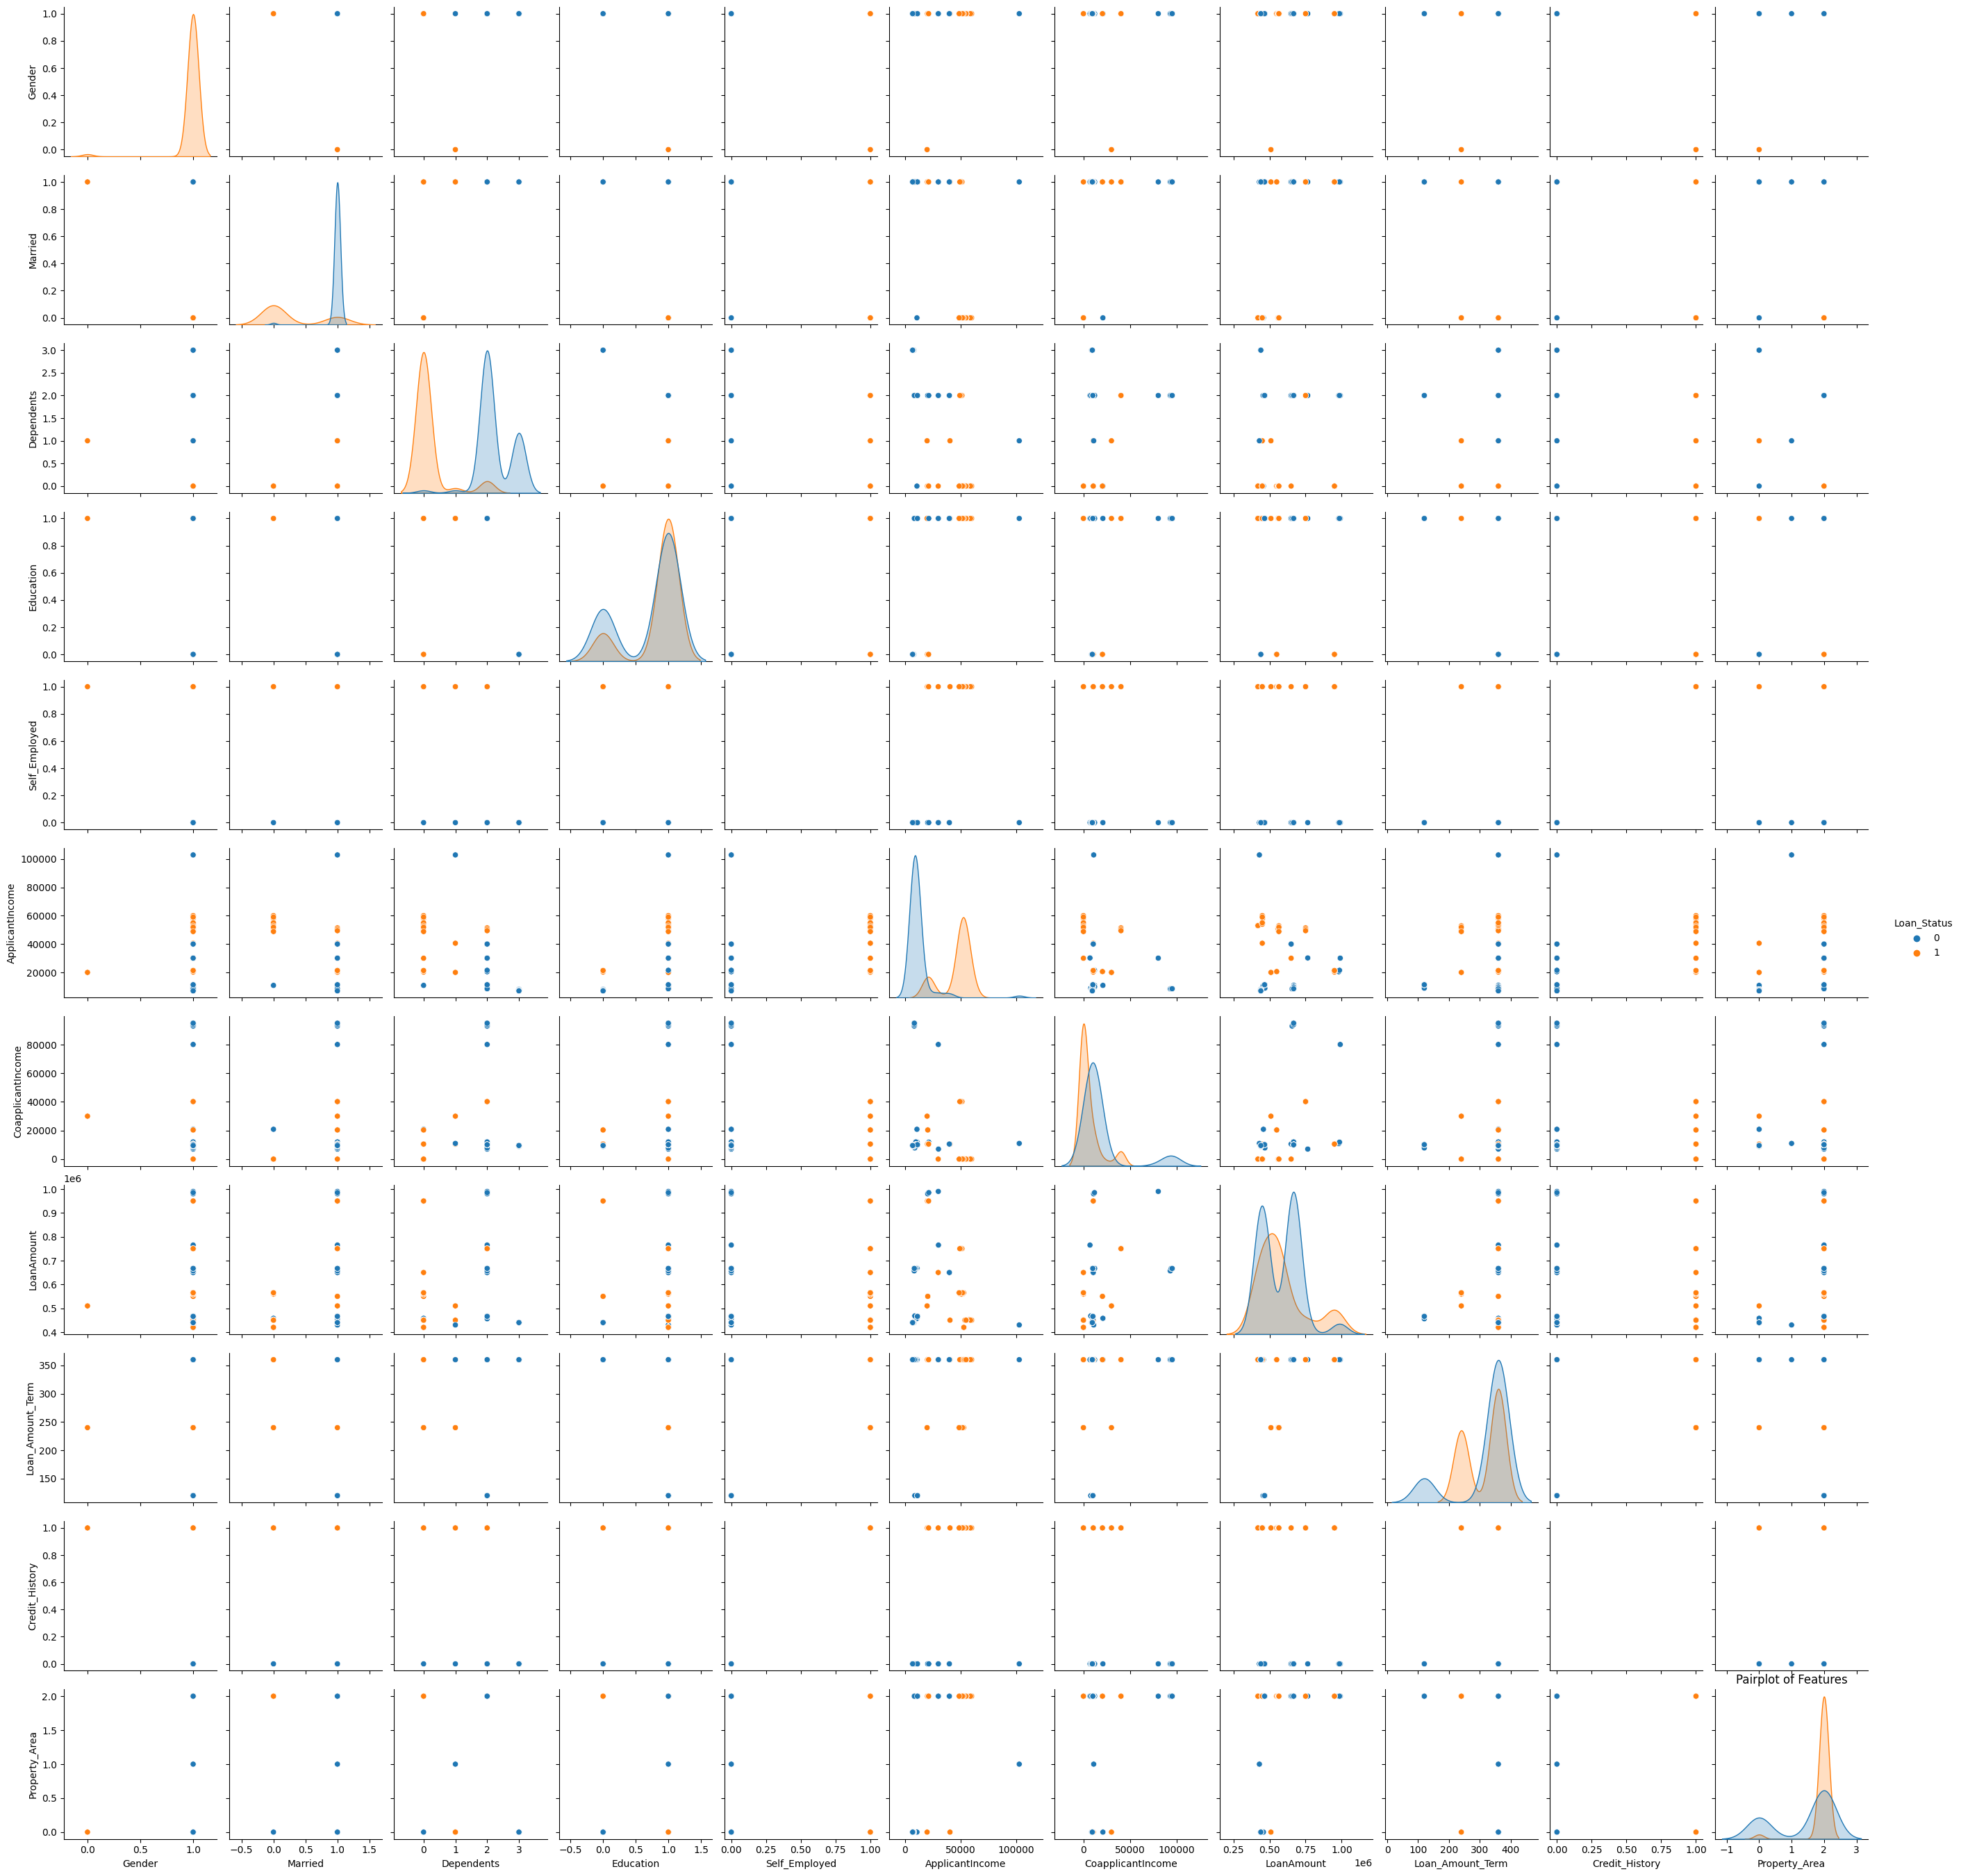

In [28]:
sns.pairplot(data=loan_dataset, hue='Loan_Status')
plt.title("Pairplot of Features")
plt.show()

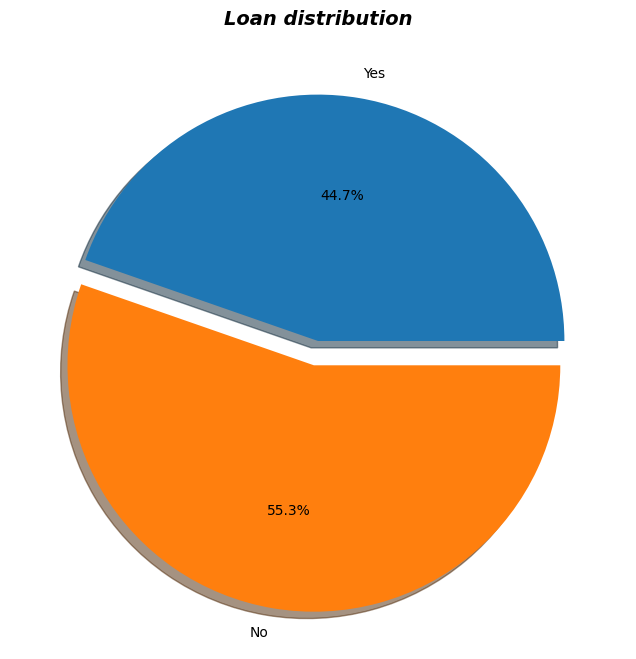

In [29]:
plt.figure(figsize=(12,8))
plt.pie(loan_dataset['Loan_Status'].value_counts(sort=False), autopct='%1.1f%%', explode=[0, 0.1], shadow=True, labels=['Yes', 'No'])
plt.title('Loan distribution', weight='bold', style='italic', fontsize=14);

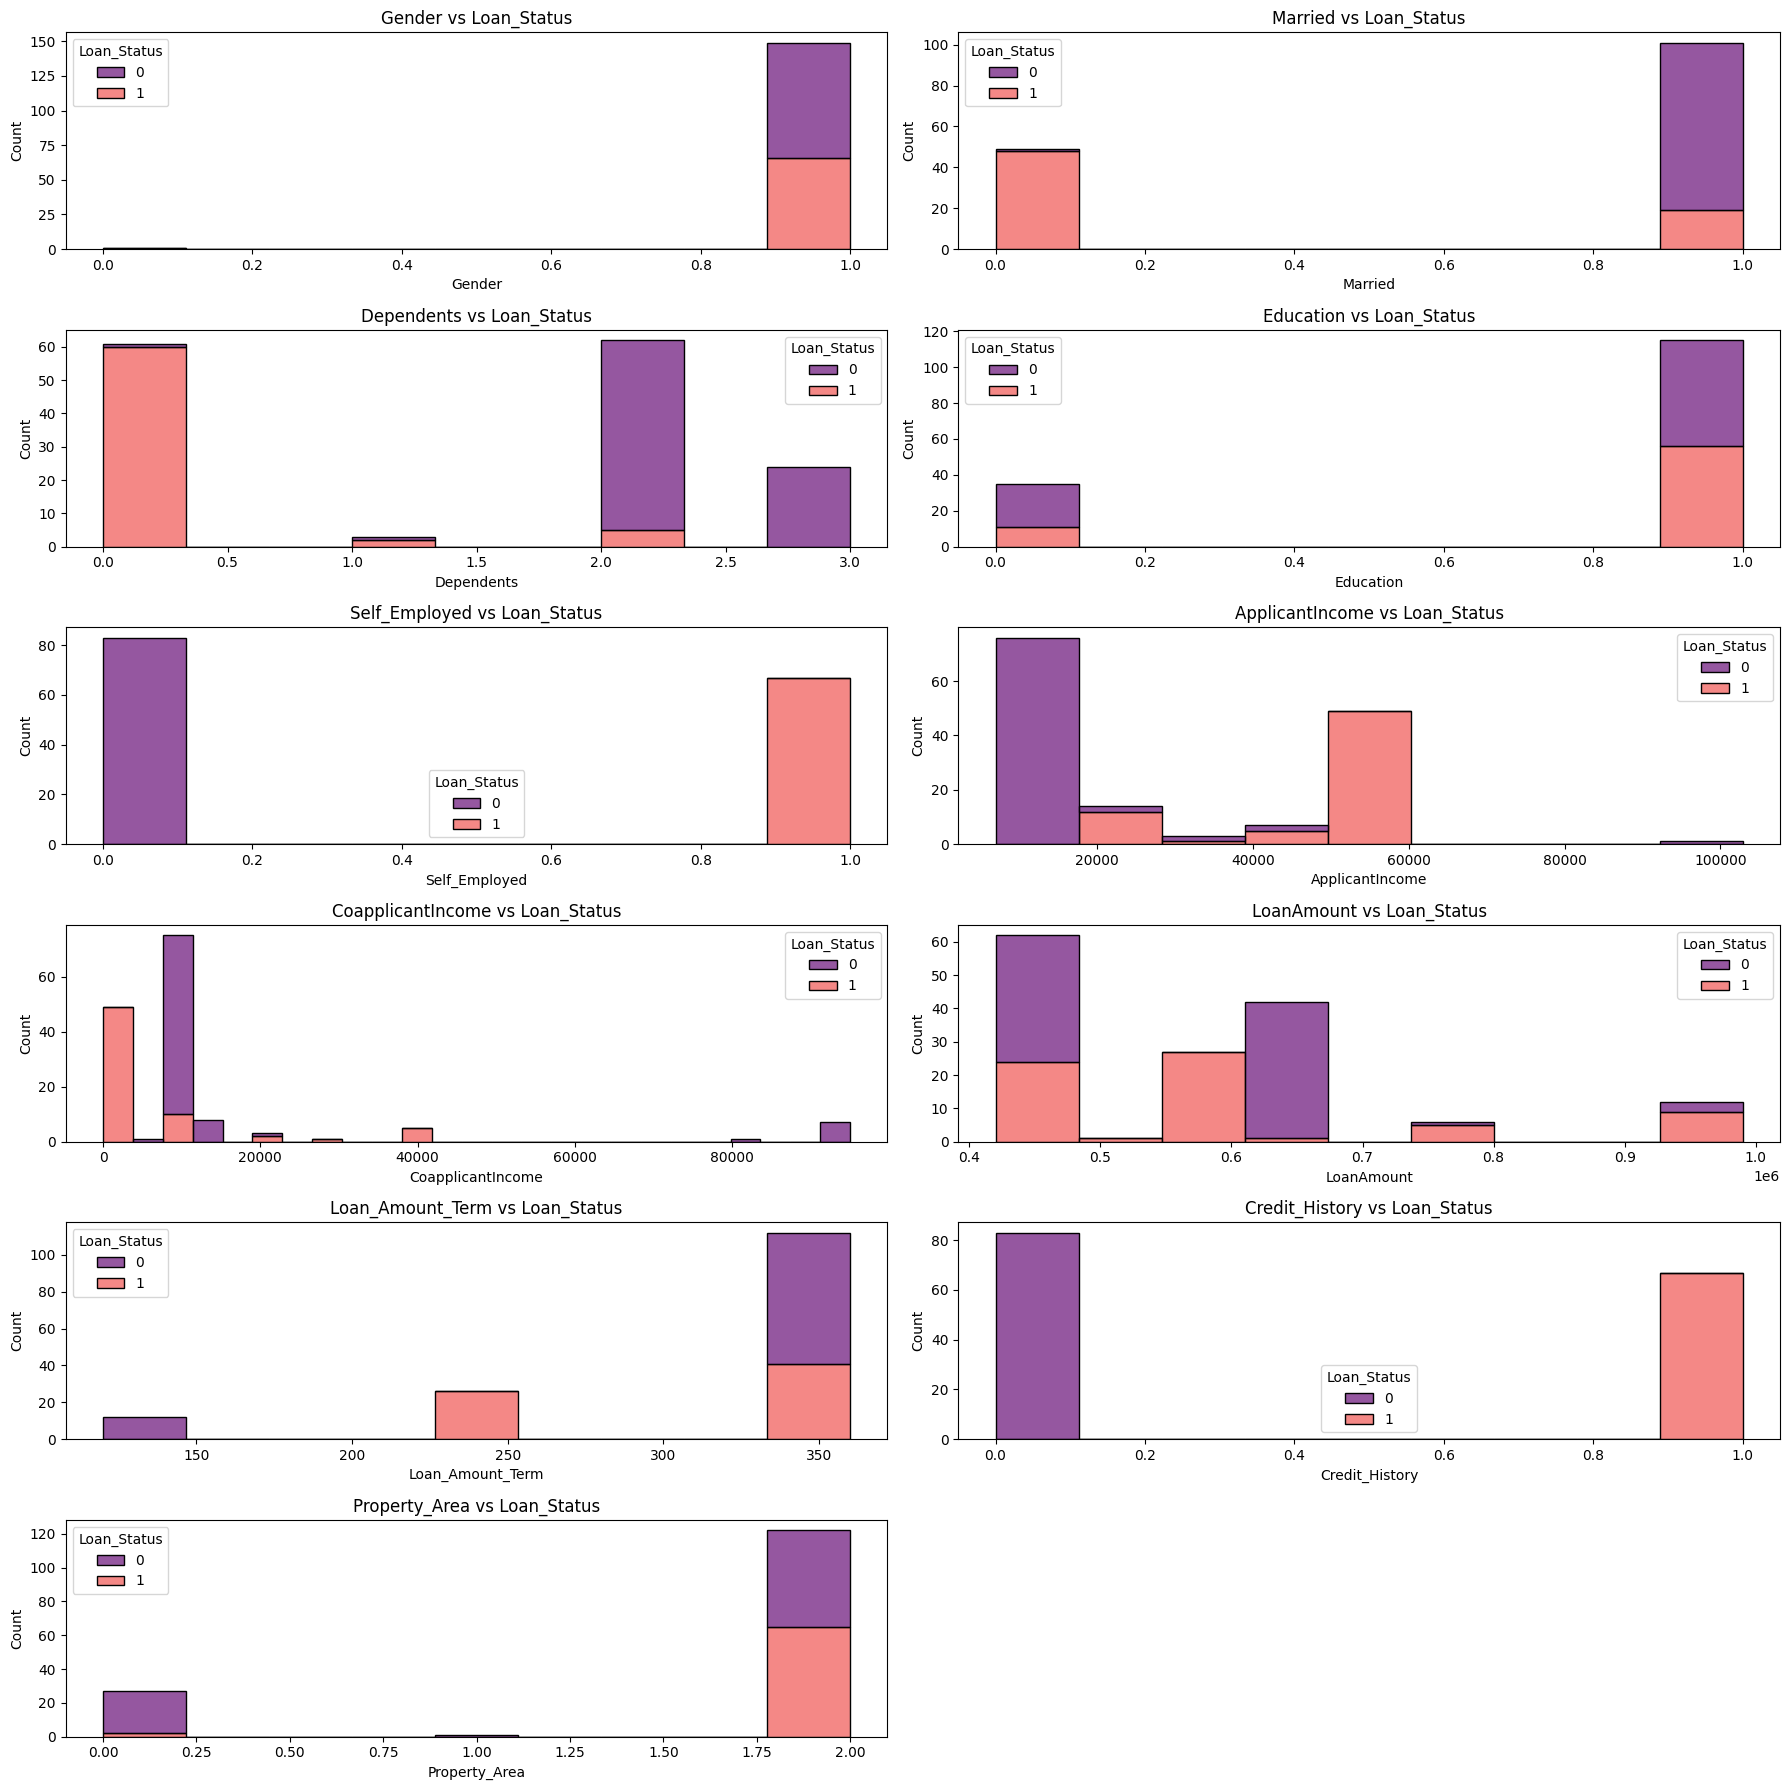

In [30]:
plt.figure(figsize=(18, 18))

# Plot Gender vs. Loan_Status
plt.subplot(6, 2, 1)
sns.histplot(data=loan_dataset, x='Gender', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('Gender vs Loan_Status')

# Plot Married vs. Loan_Status
plt.subplot(6, 2, 2)
sns.histplot(data=loan_dataset, x='Married', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('Married vs Loan_Status')

# Plot Dependents vs. Loan_Status
plt.subplot(6, 2, 3)
sns.histplot(data=loan_dataset, x='Dependents', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('Dependents vs Loan_Status')

# Plot Education vs. Loan_Status
plt.subplot(6, 2, 4)
sns.histplot(data=loan_dataset, x='Education', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('Education vs Loan_Status')

# Plot Self_Employed vs. Loan_Status
plt.subplot(6, 2, 5)
sns.histplot(data=loan_dataset, x='Self_Employed', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('Self_Employed vs Loan_Status')

# Plot ApplicantIncome vs. Loan_Status
plt.subplot(6, 2, 6)
sns.histplot(data=loan_dataset, x='ApplicantIncome', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('ApplicantIncome vs Loan_Status')

# Plot CoapplicantIncome vs. Loan_Status
plt.subplot(6, 2, 7)
sns.histplot(data=loan_dataset, x='CoapplicantIncome', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('CoapplicantIncome vs Loan_Status')

# Plot LoanAmount vs. Loan_Status
plt.subplot(6, 2, 8)
sns.histplot(data=loan_dataset, x='LoanAmount', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('LoanAmount vs Loan_Status')

# Plot Loan_Amount_Term vs. Loan_Status
plt.subplot(6, 2, 9)
sns.histplot(data=loan_dataset, x='Loan_Amount_Term', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('Loan_Amount_Term vs Loan_Status')

# Plot Credit_History vs. Loan_Status
plt.subplot(6, 2, 10)
sns.histplot(data=loan_dataset, x='Credit_History', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('Credit_History vs Loan_Status')

# Plot Property_Area vs. Loan_Status
plt.subplot(6, 2, 11)
sns.histplot(data=loan_dataset, x='Property_Area', hue="Loan_Status", multiple="stack", palette='magma')
plt.title('Property_Area vs Loan_Status')
plt.tight_layout()

plt.show()

# Train Test Split

In [31]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(150, 11) (120, 11) (30, 11)


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [34]:
logistic_regression = LogisticRegression(random_state=42)

In [35]:
logistic_regression.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [36]:
y_pred_logistic = logistic_regression.predict(X_test)

In [37]:
accuracy_logistic = accuracy_score(Y_test, y_pred_logistic)
classification_rep = classification_report(Y_test, y_pred_logistic)
conf_matrix = confusion_matrix(Y_test, y_pred_logistic)

print("Logistic Regression Model")
print(f"Accuracy: {accuracy_logistic:.4f}")

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Logistic Regression Model
Accuracy: 0.9000

Confusion Matrix:
 [[15  2]
 [ 1 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.86      0.92      0.89        13

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [39]:
rf_classifier = RandomForestClassifier(random_state=42)

In [40]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred_random = rf_classifier.predict(X_test)

In [42]:
accuracy_random = accuracy_score(Y_test, y_pred_random)
classification_rep = classification_report(Y_test, y_pred_random)
conf_matrix = confusion_matrix(Y_test, y_pred_random)
precision = precision_score(Y_test, y_pred_random)
recall = recall_score(Y_test, y_pred_random)
f1 = f1_score(Y_test, y_pred_random)

print("Random Forest Model")
print(f"Accuracy: {accuracy_random:.4f}")
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)


print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Random Forest Model
Accuracy: 1.0000
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[17  0]
 [ 0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Support Vector Machines

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [44]:
svm_classifier = SVC(kernel='linear', random_state=42)

In [45]:
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [46]:
y_pred_svm = svm_classifier.predict(X_test)

In [47]:
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
precision = precision_score(Y_test, y_pred_svm)
recall = recall_score(Y_test, y_pred_svm)
f1 = f1_score(Y_test, y_pred_svm)
confusion = confusion_matrix(Y_test, y_pred_svm)
classification_rep = classification_report(Y_test, y_pred_svm)

print("Support Vector Machines")
print("Accuracy:", accuracy_svm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Support Vector Machines
Accuracy: 0.9666666666666667
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.962962962962963

Confusion Matrix:
 [[16  1]
 [ 0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# k-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [49]:
k = 5  #Adjust k here
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [50]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [51]:
y_pred_knn = knn_classifier.predict(X_test)

In [52]:
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
classification_rep = classification_report(Y_test, y_pred_knn)
conf_matrix = confusion_matrix(Y_test, y_pred_knn)
precision = precision_score(Y_test, y_pred_knn)
recall = recall_score(Y_test, y_pred_knn)
f1 = f1_score(Y_test, y_pred_knn)

print("Random Forest Model")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Random Forest Model
Accuracy: 0.9667
Precision Score: 0.9285714285714286
Recall Score: 1.0
F1 Score: 0.962962962962963

Confusion Matrix:
 [[16  1]
 [ 0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [54]:
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

In [55]:
gradient_boosting_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [56]:
y_pred_gradient = gradient_boosting_model.predict(X_test)

In [57]:
accuracy_gradient = accuracy_score(Y_test, y_pred_gradient)
classification_rep = classification_report(Y_test, y_pred_gradient)
conf_matrix = confusion_matrix(Y_test, y_pred_gradient)
precision = precision_score(Y_test, y_pred_gradient)
recall = recall_score(Y_test, y_pred_gradient)
f1 = f1_score(Y_test, y_pred_gradient)

print("Random Forest Model")
print(f"Accuracy: {accuracy_gradient:.4f}")
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Random Forest Model
Accuracy: 1.0000
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[17  0]
 [ 0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **Model Accuracy Comparision**

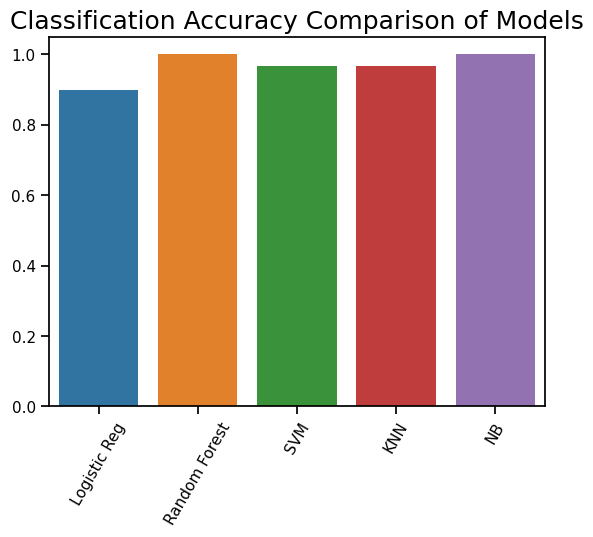

In [58]:
sns.set(context='notebook', style=None, palette='tab10')
models = ['Logistic Reg', 'Random Forest', 'SVM','KNN','NB']
scores = [accuracy_logistic, accuracy_random, accuracy_svm, accuracy_knn, accuracy_gradient]
ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=18)
for item in ax.get_xticklabels():
    item.set_rotation(60)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

# Prediction  of the Model

## Prediction_1

In [59]:
input_data = [1, 1, 1, 0, 1, 25000, 3000, 200000, 360, 1, 1]

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = rf_classifier.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
   print('The Person will be granted loan')
else:
   print('The Person will not be granted loan')


[1]
The Person will be granted loan


## Prediction_2

In [60]:
input_data = [0, 0, 2, 1, 0, 10000, 5000, 150000, 240, 0, 0]

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = rf_classifier.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
   print('The Person will be granted loan')
else:
   print('The Person will not be granted loan')

[0]
The Person will not be granted loan
